# Task Description :
Develop a kNN model for regression to predict the bioconcentration factor (BCF) for the given data. Please keep in mind the following:


*   1 bonus point - **(functioning model)** and 1 bonus point - **(top 5 models)**.
*   Submission Deadline is **May 12, 23:59**.

**Note: Submission is not compulsory**.

In [11]:
# import all libraries  (You can import other libraries if required)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [12]:
# Upload training data
df_bcf = pd.read_csv("data\BCF_training_data.csv")

df_bcf.head()

,CAS,SMILES,Experimental value [log(L/kg)],NumAromaticRings,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,fr_COO,fr_COO2,fr_halogen,MolWt,MolLogP
0,50-29-3,c1cc(ccc1C(c2ccc(cc2)Cl)C(Cl)(Cl)Cl)Cl,3.605,2,0,5,2,100,0.540334,0.00,85.0370,2.474117,494.044161,0,0,5,354.491,6.4955
1,50-30-6,O=C(O)c1c(cccc1Cl)Cl,-0.222,1,1,4,1,58,0.740184,37.30,43.4213,3.318913,276.242090,1,1,2,191.013,2.6916
2,50-31-7,O=C(O)c1c(ccc(c1Cl)Cl)Cl,0.073,1,1,5,1,64,0.744344,37.30,48.4313,3.428931,335.668528,1,1,3,225.458,3.3450
3,50-32-8,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45,2.731,5,0,0,0,92,0.243454,0.00,87.6520,2.230840,1069.721887,0,0,0,252.316,5.7372
4,51-28-5,O=[N+]([O-])c1ccc(O)c(c1)[N+](=O)[O-],0.052,1,5,7,2,68,0.548520,106.51,41.4156,3.267052,375.287402,0,0,0,184.107,1.2086


In [13]:
# Perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]

# Define features and lable
X = df_bcf.drop(['CAS','SMILES','Experimental value [log(L/kg)]','NumAromaticRings','NumHeteroatoms','NumRotatableBonds','BalabanJ','fr_halogen'],axis=1)
y = df_bcf['Experimental value [log(L/kg)]'].to_numpy()

# Scale the data
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

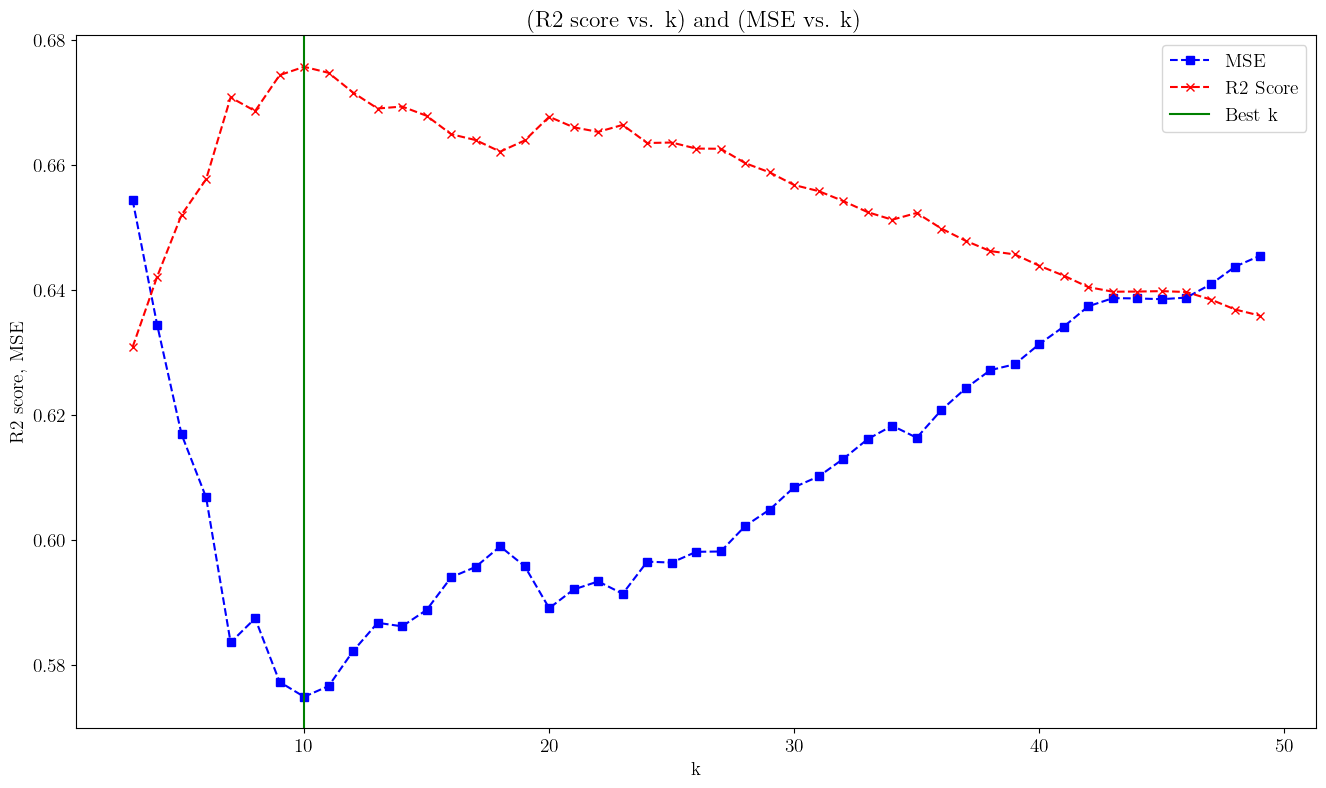

Best value of K:  10


In [14]:
# Do cross validation with different k values and visualize (R2_square vs k and MSE vs k) to know what k value performs best on your testing data.

num_k = np.arange(3, 50, 1).astype(int)
y_pred = []

for k in num_k:
    knn = KNeighborsRegressor(n_neighbors = k)
    y_preds = cross_val_predict(knn, X_norm, y, cv=50)
    y_pred.append(y_preds)

MSE = []
R2 = []

for i in y_pred:
    mse = mean_squared_error(y, i)
    R2_Score = r2_score(y, i)

    MSE.append(mse)
    R2.append(R2_Score)

# Plot performance of different values of k
plt.figure(figsize=(16,9))
plt.plot(num_k, MSE, 'bs--', label='MSE')
plt.plot(num_k, R2, 'rx--', label='R2 Score')
plt.axvline(x = num_k[MSE.index(min(MSE))], color = 'g', label = 'Best k')
plt.xlabel('k')
plt.ylabel('R2 score, MSE')
plt.title('(R2 score vs. k) and (MSE vs. k)')
plt.legend()
plt.show()

# Print the best value of k
k_best = num_k[MSE.index(min(MSE))]
print("Best value of K: ", k_best)

In [15]:
# Final trained model using all the data points with your k value (Please do not calculate any performance metrics, we will do that on our own by checking performance of your model on our testing dataset).

knn_best = KNeighborsRegressor(n_neighbors = k_best)
knn_best.fit(X_norm, y)

KNeighborsRegressor(n_neighbors=10)

In [16]:
# Upload test dataset
df_bcf_test = pd.read_csv('data\BCF_testing_data.csv')

df_bcf_test.head()

,CAS,SMILES,Experimental value [log(L/kg)],NumAromaticRings,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,fr_COO,fr_COO2,fr_halogen,MolWt,MolLogP
0,125116-23-6,OC3(Cn1ncnc1)(C(Cc2ccc(cc2)Cl)CCC3(C)(C)),2.111,2,4,5,4,118,0.939967,50.94,86.6328,1.838494,623.863424,0,0,1,319.836,3.34150
1,2032-65-7,O=C(Oc1cc(c(c(c1)C)SC)C)NC,1.875,1,3,4,2,82,0.786441,38.33,62.7807,2.980890,353.845825,0,0,0,225.313,2.74354
2,161050-58-4,O=C(NN(C(=O)c1cc(cc(c1)C)C)C(C)(C)C)c2cccc(OC)c2C,1.041,2,3,5,3,144,0.825973,58.64,107.0357,2.378553,846.096991,0,0,0,368.477,4.20616
3,220899-03-6,O=C(c1c(OC)c(OC)c(OC)cc1C)c2c(OC)ccc(c2C)Br,2.724,2,5,6,6,134,0.665183,53.99,99.6985,2.793574,814.192243,0,0,1,409.276,4.33134
4,2212-67-1,O=C(N1CCCCCC1)SCC,1.857,0,2,3,1,70,0.628832,20.31,53.5690,2.319771,141.463962,0,0,0,187.308,2.73550


In [17]:
# Testing the final trained model using test dataset
def best_knn_model(df_bcf_test):
    # Define features and lable for testing dataset
    X_test = df_bcf_test.drop(['CAS','SMILES','Experimental value [log(L/kg)]','NumAromaticRings','NumHeteroatoms','NumRotatableBonds','BalabanJ','fr_halogen'],axis=1)
    y_test = df_bcf_test['Experimental value [log(L/kg)]'].to_numpy()
    # Scale the data
    X_test_norm = scaler.transform(X_test)
    # Predict the values
    y_test_pred = knn_best.predict(X_test_norm)
    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_test_pred)
    R2_Score = r2_score(y_test, y_test_pred)
    print("Mean squared Error   : ", mse)
    print("R2 Score             : ", R2_Score)
    return

# Call the function to test the model
best_knn_model(df_bcf_test)

Mean squared Error   :  0.7649380211666668
R2 Score             :  0.18406683022729275


**Note:**  
You have choice to use subset of input features or all input features for validation and training final model. You can search keywords on google like *'how to select important input features for training regression Machine Learning models'* or you can randomly try different input feature combinations as of now to see if it improves performance on test set. However we donot expect you to choose subset of input variables (as it is not taught yet). You can simply choose all the given features as inputs.
